In [3]:
# import winsound as sd
# def beep():
#     fr = 2000    # range : 37 ~ 32767
#     du = 1000     # 1000 ms ==1second
#     sd.Beep(fr, du) # winsound.Beep(frequency, duration)
# beep()

In [4]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
import matplotlib.pyplot as plt 
rc('font',family='Malgun Gothic') # ÌïúÍ∏Ä
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏

import os
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import HTML
import time
import re

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%cd /content/drive/MyDrive/Cakd3_Project/1.ldata_·Ñí·Öß·Ü´·Ñå·Ö•·Üº

/content/drive/MyDrive/Cakd3_Project/1.ldata_·Ñí·Öß·Ü´·Ñå·Ö•·Üº


In [16]:
%pwd

'/content/drive/MyDrive/Cakd3_Project/1.ldata_·Ñí·Öß·Ü´·Ñå·Ö•·Üº'

In [17]:
# ÌååÏùº Î∂àÎü¨ÏôÄÏÑú Î≥ÄÏàòÏóê Ï†ÄÏû•
path = './dataset'
file_list = os.listdir(path)

data_li = []
for file in file_list:
    data = pd.read_csv(f'dataset/{file}',encoding='cp949')
    file_name = file.replace('.txt','')
    globals()[file_name] = data
    data_li.append(file_name)

In [18]:
data_li

['channel', 'prodcat', 'membership', 'purprd', 'cust', 'compuse']

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

In [19]:
# information ÌôïÏù∏
for i in range(len(data_li)):
    print(f'============  {data_li[i]}  ============')
    print(globals()[data_li[i]].info())
    print('====================================\n')

============  channel  ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824 entries, 0 to 8823
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Í≥†Í∞ùÎ≤àÌò∏    8824 non-null   int64 
 1   Ï†úÌú¥ÏÇ¨     8824 non-null   object
 2   Ïù¥Ïö©ÌöüÏàò    8824 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 206.9+ KB
None

============  prodcat  ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ï†úÌú¥ÏÇ¨     4386 non-null   object
 1   ÎåÄÎ∂ÑÎ•òÏΩîÎìú   4386 non-null   int64 
 2   Ï§ëÎ∂ÑÎ•òÏΩîÎìú   4386 non-null   int64 
 3   ÏÜåÎ∂ÑÎ•òÏΩîÎìú   4386 non-null   object
 4   Ï§ëÎ∂ÑÎ•òÎ™Ö    4386 non-null   object
 5   ÏÜåÎ∂ÑÎ•òÎ™Ö    4386 non-null   object
dtypes: int64(2), object(4)
memory usage: 205.7+ KB
None

============  membership  ============
<class 'pandas.core

# PURPRD

In [ ]:
# purprd Íµ¨Îß§ÏùºÏûê type Î≥ÄÍ≤Ω Î∞è ÎÖÑ, Î∞òÍ∏∞, Î∂ÑÍ∏∞, ÏöîÏùº Ï∂îÍ∞Ä
purprd['Íµ¨Îß§ÏùºÏûê'] = pd.to_datetime(purprd['Íµ¨Îß§ÏùºÏûê'], format='%Y%m%d')
purprd['year'] = purprd['Íµ¨Îß§ÏùºÏûê'].dt.year
purprd['quarter'] = purprd['Íµ¨Îß§ÏùºÏûê'].dt.quarter
purprd['weekday'] = purprd['Íµ¨Îß§ÏùºÏûê'].dt.weekday # Ïõî 0 ~ Ïùº 6

def to_half(year,quarter):
    if (year==2014) & (quarter in [1,2]):
        return 1
    elif (year==2014) & (quarter in [3,4]):
        return 2
    elif (year==2015) & (quarter in [1,2]):
        return 3
    else:
        return 4
        
purprd['half'] = purprd.apply(lambda x: to_half(x['year'], x['quarter']), axis=1)

# Í∏∞Ï°¥Í≥†Í∞ù Ï†ÅÏö©(Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞)

In [ ]:
# Í∏∞Ï°¥Í≥†Í∞ù => Îß§ Î∂ÑÍ∏∞ 1Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ìïú Í≥†Í∞ùÏúºÎ°ú ÌïúÏ†ï
# Í∏∞Ï°¥Í≥†Í∞ùÎßå ÎÇ®Í∏¥ dataframe ÏÉùÏÑ±
all_cust = pd.pivot_table(purprd,
                         index='Í≥†Í∞ùÎ≤àÌò∏',
                         columns='half',
                         values='Íµ¨Îß§Í∏àÏï°',
                         aggfunc='sum')

existing_cust_idx = all_cust.dropna().index.tolist() # Í∏∞Ï°¥Í≥†Í∞ù Í≥†Í∞ùÎ≤àÌò∏

for data in data_li:
    try:
        globals()[data] = globals()[data].query(f'Í≥†Í∞ùÎ≤àÌò∏ == {existing_cust_idx}')
    except:
        pass

# CUST

In [ ]:
# Í±∞Ï£ºÏßÄÏó≠ Ïà´Ïûê -> Ïù¥Î¶Ñ Î≥ÄÌôò / ÏÑúÏö∏Ïãú ÌïòÎÇòÎ°ú Î¨∂Ïùå
Í±∞Ï£ºÏßÄÏó≠ = {}
with open('ÏßÄÏó≠ÏΩîÎìú.txt', 'r', encoding='utf8') as f:
    for line in f:
        ÏßÄÏó≠ÏΩîÎìú, ÏßÄÏó≠Î™Ö = line.strip().split('=')
        if ÏßÄÏó≠Î™Ö[:2] == 'ÏÑúÏö∏':
            ÏßÄÏó≠Î™Ö = 'ÏÑúÏö∏Ïãú'
        Í±∞Ï£ºÏßÄÏó≠[int(ÏßÄÏó≠ÏΩîÎìú)] = ÏßÄÏó≠Î™Ö
        
cust['Í±∞Ï£ºÏßÄÏó≠'] = cust['Í±∞Ï£ºÏßÄÏó≠'].fillna(0)

def to_area(ÏßÄÏó≠ÏΩîÎìú):
    if ÏßÄÏó≠ÏΩîÎìú == 0:
        return 'ÎØ∏Í∏∞Ïû¨'
    return Í±∞Ï£ºÏßÄÏó≠[int(ÏßÄÏó≠ÏΩîÎìú)]

cust['Í±∞Ï£ºÏßÄÏó≠'] = cust['Í±∞Ï£ºÏßÄÏó≠'].apply(lambda x: to_area(x))

In [ ]:
# Ïó∞Î†πÎåÄ Î¨∂Ïñ¥Ï§å
def cat_age(age):
    if age == '19ÏÑ∏Ïù¥Ìïò':
        return 10
    elif age in ['20ÏÑ∏~24ÏÑ∏', '25ÏÑ∏~29ÏÑ∏']:
        return 20
    elif age in ['30ÏÑ∏~34ÏÑ∏', '35ÏÑ∏~39ÏÑ∏']:
        return 30
    elif age in ['40ÏÑ∏~44ÏÑ∏', '45ÏÑ∏~49ÏÑ∏']:
        return 40
    elif age in ['50ÏÑ∏~54ÏÑ∏', '55ÏÑ∏~59ÏÑ∏']:
        return 50
    else:
        return 60
    
cust['Ïó∞Î†πÎåÄ'] = cust['Ïó∞Î†πÎåÄ'].apply(lambda x: cat_age(x))

#  <font color=red>__Ï¢ÖÏÜçÎ≥ÄÏàò__</font>

In [ ]:
# Ï¢ÖÏÜçÎ≥ÄÏàò
def to_y(df,half1,half2):
    """
    Ï†ÑÏ≤¥ Îß§Ï∂ú Ï¶ùÍ∞êÏú®ÏùÑ Í≥†Î†§Ìïú Í≥†Í∞ùÎ≥Ñ Îß§Ï∂ú Ï¶ùÍ∞êÏú®(Î∞òÍ∏∞ Í∏∞Ï§Ä)
    -> Í∞êÏÜåÍ≥†Í∞ù : 1
    -> Ï¶ùÍ∞ÄÍ≥†Í∞ù : 0
    """
    sales = pd.pivot_table(df,index='Í≥†Í∞ùÎ≤àÌò∏', # Í≥†Í∞ùÎ≥Ñ Î∞òÍ∏∞ Îß§Ï∂ú
                              columns = 'half',
                              values = 'Íµ¨Îß§Í∏àÏï°',
                              aggfunc= 'sum')
    rate_variation = (sum(sales[int(half2)])-sum(sales[int(half1)]))/sum(sales[int(half1)]) # Ï†ÑÏ≤¥ Îß§Ï∂ú Ï¶ùÍ∞êÏú®
    sales[f'y_{half1}_{half2}'] = (sales[int(half2)] - sales[int(half1)])/sales[int(half1)]/rate_variation # Í≥†Í∞ùÎ≥Ñ Îß§Ï∂ú Ï¶ùÍ∞êÏú®
    
    def to_label(sales_variation): # Îß§Ï∂ú Í∞êÏÜå Í≥†Í∞ù : 1
        if sales_variation >= 0:
            return 0
        else:
            return 1
    
    sales[f'y_{half1}_{half2}'] = sales[f'y_{half1}_{half2}'].apply(lambda x: to_label(x))
    sales = sales[[f'y_{half1}_{half2}']]
    return sales.reset_index()

y = to_y(purprd, 1, 3) # lable

In [ ]:
to_y(purprd, 1, 2)

# MEMBERSHIP

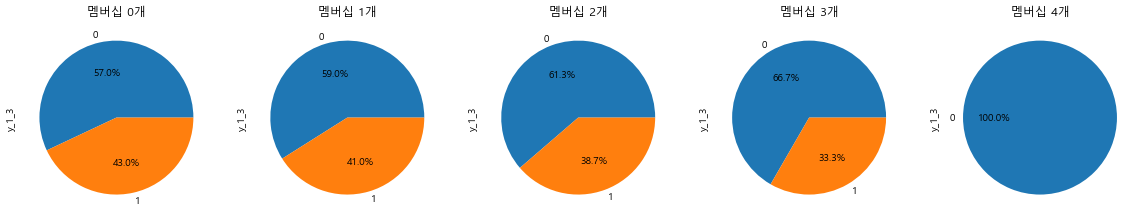

In [ ]:
# membership Í∞ÄÏûÖ Í∞úÏàò
membership_cust = pd.pivot_table(membership,
              index='Í≥†Í∞ùÎ≤àÌò∏',
              columns='Î©§Î≤ÑÏã≠Î™Ö',
              values='Í∞ÄÏûÖÎÖÑÏõî',
              aggfunc='count').fillna(0)
membership_cust['Í∞ÄÏûÖÍ∞úÏàò'] = membership_cust.sum(axis=1)

membership_y = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(membership_cust['Í∞ÄÏûÖÍ∞úÏàò']).fillna(0)


fig, axes = plt.subplots(1,5,figsize=(20,5))

for i in range(5):
    membership_y.query(f'Í∞ÄÏûÖÍ∞úÏàò=={i}')['y_1_3'].value_counts().plot(kind='pie', 
                                                                  autopct='%.1f%%',
                                                                  ax=axes[i], 
                                                                  subplots=True)
    axes[i].set_title(f'Î©§Î≤ÑÏã≠ {i}Í∞ú')
    
# => membership Í∞ÄÏûÖ Í∞úÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Íµ¨Îß§ Í∞êÏÜåÌïú Í≥†Í∞ùÏù¥ Ï†ÅÏùå

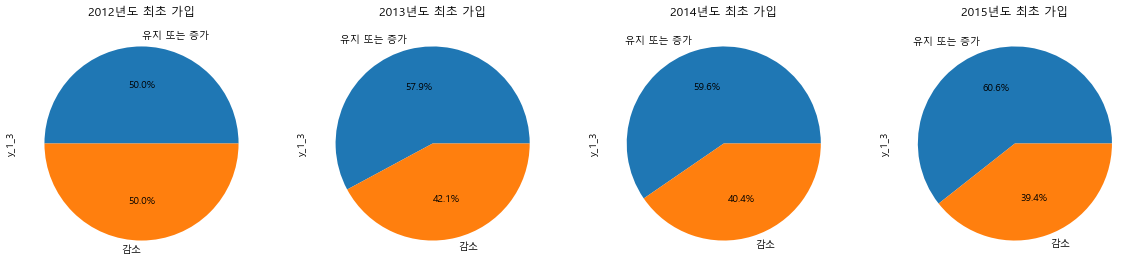

In [ ]:
# ÏµúÏ¥à membership Í∞ÄÏûÖÎÖÑÎèÑ
membership['Í∞ÄÏûÖÎÖÑÏõî'] = pd.to_datetime(membership['Í∞ÄÏûÖÎÖÑÏõî'], format='%Y%m')
membership['Í∞ÄÏûÖÎÖÑÎèÑ'] = membership['Í∞ÄÏûÖÎÖÑÏõî'].dt.year

first_membership_date = pd.pivot_table(membership,
                                index='Í≥†Í∞ùÎ≤àÌò∏',
                                values='Í∞ÄÏûÖÎÖÑÎèÑ',
                                aggfunc='min')

first_membership_date_y = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(first_membership_date).dropna()

fig, axes = plt.subplots(1,4,figsize=(20,5))

for n,i in enumerate(range(2012,2016)):
    first_membership_date_y.query(f'Í∞ÄÏûÖÎÖÑÎèÑ=={i}')['y_1_3'].value_counts().plot(kind='pie', 
                                                                  autopct='%.1f%%',
                                                                  ax=axes[n], 
                                                                  labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                  subplots=True)
    axes[n].set_title(f'{i}ÎÖÑÎèÑ ÏµúÏ¥à Í∞ÄÏûÖ')

# => Î©§Î≤ÑÏã≠ Í∞ÄÏûÖ(ÏµúÏ¥à)ÌïúÏßÄ Ïò§ÎûòÎê†ÏàòÎ°ù Íµ¨Îß§Í∞êÏÜå Í≥†Í∞ù Ï¶ùÍ∞Ä
# Ï∞∏Í≥† : 2012ÎÖÑÎèÑÎäî 6Î™ÖÎ∞ñÏóê ÏóÜÏùå / 2013 ~ 2015ÎÖÑÎèÑÎäî 2000Î™Ö ÏïàÌåé

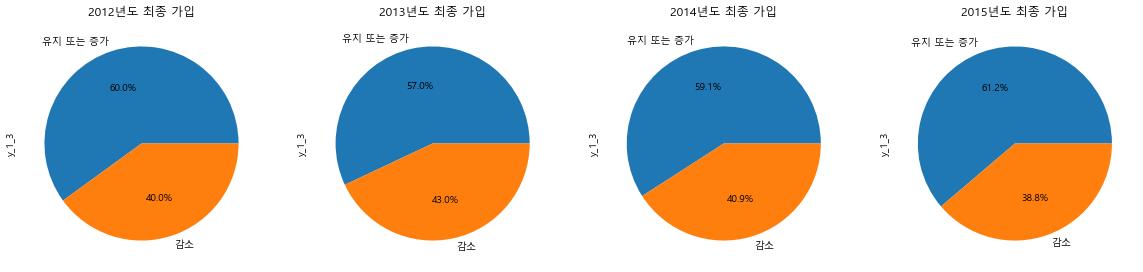

In [ ]:
# ÏµúÏ¢Ö membership Í∞ÄÏûÖÎÖÑÎèÑ
last_membership_date = pd.pivot_table(membership,
                                index='Í≥†Í∞ùÎ≤àÌò∏',
                                values='Í∞ÄÏûÖÎÖÑÎèÑ',
                                aggfunc='max')

last_membership_date_y = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(last_membership_date).dropna()

fig, axes = plt.subplots(1,4,figsize=(20,5))

for n,i in enumerate(range(2012,2016)):
    last_membership_date_y.query(f'Í∞ÄÏûÖÎÖÑÎèÑ=={i}')['y_1_3'].value_counts().plot(kind='pie', 
                                                                  autopct='%.1f%%',
                                                                  ax=axes[n], 
                                                                  labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                  subplots=True)
    axes[n].set_title(f'{i}ÎÖÑÎèÑ ÏµúÏ¢Ö Í∞ÄÏûÖ')

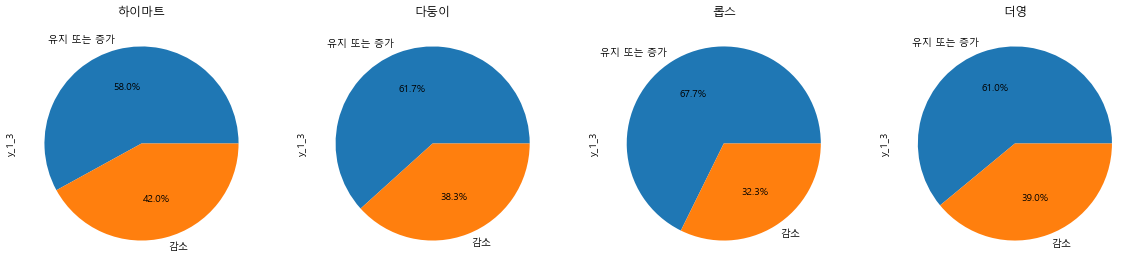

In [ ]:
# membership Ï¢ÖÎ•ò
fig, axes = plt.subplots(1,4,figsize=(20,5))

for n, membership_name in enumerate(membership['Î©§Î≤ÑÏã≠Î™Ö'].unique()):
    globals()[f'{membership_name}'] = membership.query(f'Î©§Î≤ÑÏã≠Î™Ö=="{membership_name}"')
    pd.merge(globals()[f'{membership_name}'], y, on='Í≥†Í∞ùÎ≤àÌò∏')['y_1_3'].value_counts(1).plot(kind='pie', 
                                                                                          autopct='%.1f%%',
                                                                                          ax=axes[n], 
                                                                                          labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                                          subplots=True)
    axes[n].set_title(membership_name)

# Ï∞∏Í≥† : Í≥†Í∞ù Ï§ëÎ≥µ ÏûàÏùå

In [ ]:
pd.pivot_table(membership,
               index='Î©§Î≤ÑÏã≠Î™Ö',
               columns='Í∞ÄÏûÖÎÖÑÎèÑ',
               values='Í∞ÄÏûÖÎÖÑÏõî',
               aggfunc='count')

Í∞ÄÏûÖÎÖÑÎèÑ  2012    2013    2014    2015
Î©§Î≤ÑÏã≠Î™Ö                              
Îã§Îë•Ïù¥    NaN  1081.0   613.0   303.0
ÎçîÏòÅ     6.0    24.0   326.0   267.0
Î°≠Ïä§     NaN    52.0   158.0   109.0
ÌïòÏù¥ÎßàÌä∏   NaN   999.0  1580.0  1789.0

# CHANNEL  
  
ÏµúÍ∑º 3Í∞úÏõî Îç∞Ïù¥ÌÑ∞(2015.10 ~ 2015.12)

In [ ]:
channel_count = pd.pivot_table(channel,
              index='Í≥†Í∞ùÎ≤àÌò∏',
              columns='Ï†úÌú¥ÏÇ¨',
              values='Ïù¥Ïö©ÌöüÏàò')

channel_count['APPÎ°úÍ∑∏Ïù∏ÌöüÏàò'] = channel_count[channel_count.columns[channel_count.columns.str.contains('APP')]].sum(axis=1)
channel_count['ONLINEÍµ¨Îß§ÌöüÏàò'] = channel_count[channel_count.columns[channel_count.columns.str.contains('ONLINE')]].sum(axis=1)

In [ ]:
print('channel Ïù¥Ïö©ÏûêÏàò : ', len(channel_count))
print(' - APP, ONLINE Î™®Îëê Ïù¥Ïö© : ', len(channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò>0'))) # Îëò Îã§ Ïù¥Ïö© 
print(' - APPÎßå Ïù¥Ïö© : ', len(channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò==0')))
print(' - ONLINEÎßå Ïù¥Ïö© : ', len(channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò>0')))

channel Ïù¥Ïö©ÏûêÏàò :  6686
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© :  1419
 - APPÎßå Ïù¥Ïö© :  4826
 - ONLINEÎßå Ïù¥Ïö© :  441


In [ ]:
channel_count = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(channel_count)
channel_count = pd.merge(channel_count, cust, on='Í≥†Í∞ùÎ≤àÌò∏').fillna(0)

<AxesSubplot:title={'center':'APP, ONLINE Î™®Îëê ÎØ∏ÏÇ¨Ïö©'}, ylabel='y_1_3'>

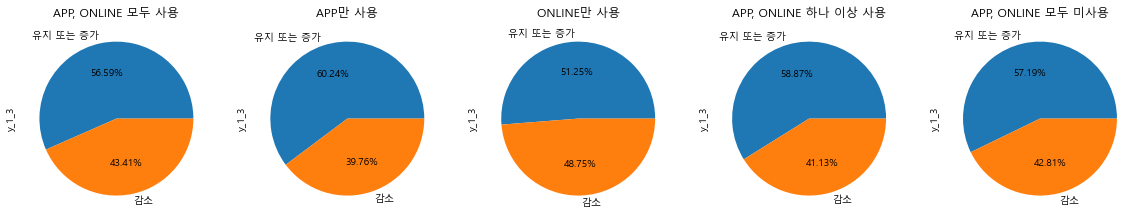

In [ ]:
# app / online ÏÇ¨Ïö©Ïó¨Î∂Ä
fig, axes = plt.subplots(1,5,figsize=(20,5))

channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò>0')['y_1_3'].value_counts().plot(kind='pie',
                                                                             autopct='%.2f%%',
                                                                             labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                             title='APP, ONLINE Î™®Îëê ÏÇ¨Ïö©',
                                                                             ax=axes[0])

channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò==0')['y_1_3'].value_counts().plot(kind='pie',
                                                                             autopct='%.2f%%',
                                                                             labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                             title='APPÎßå ÏÇ¨Ïö©',
                                                                             ax=axes[1])

channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò>0')['y_1_3'].value_counts().plot(kind='pie',
                                                                             autopct='%.2f%%',
                                                                             labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                             title='ONLINEÎßå ÏÇ¨Ïö©',
                                                                             ax=axes[2])

channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 | ONLINEÍµ¨Îß§ÌöüÏàò>0')['y_1_3'].value_counts().plot(kind='pie',
                                                                             autopct='%.2f%%',
                                                                             labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                             title='APP, ONLINE ÌïòÎÇò Ïù¥ÏÉÅ ÏÇ¨Ïö©',
                                                                             ax=axes[3])

channel_count.query('APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò==0')['y_1_3'].value_counts().plot(kind='pie',
                                                                             autopct='%.2f%%',
                                                                             labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                             title='APP, ONLINE Î™®Îëê ÎØ∏ÏÇ¨Ïö©',
                                                                             ax=axes[4])

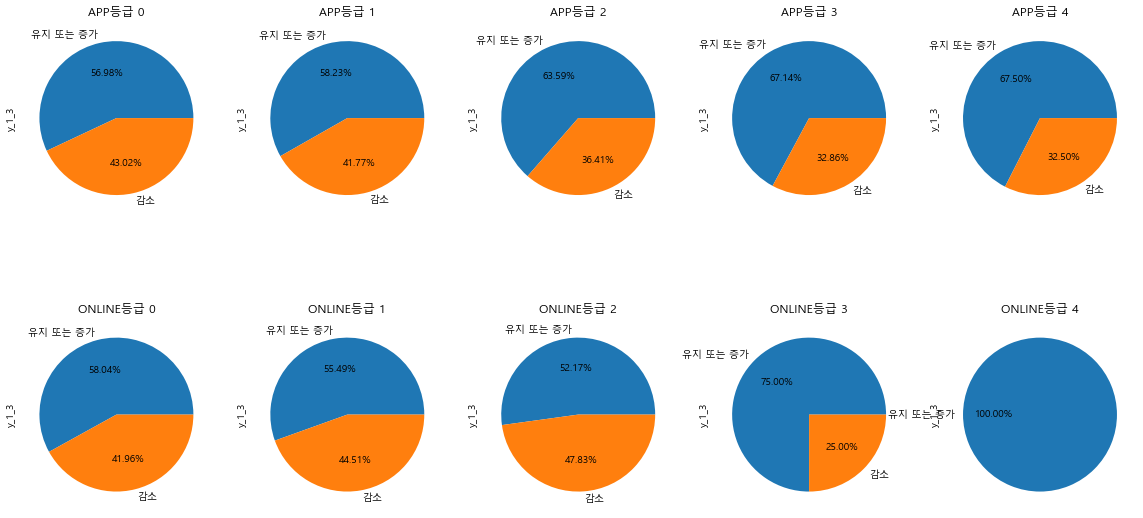

In [ ]:
def to_cat(num): # ÏûÑÏùòÎ°ú ÎÇòÎàî(Í∏∞Ï§Ä Îã§Ïãú Ï†ïÌïòÍ∏∞üëª)
    if num == 0:
        return 0
    elif 0 < num < 30:
        return 1
    elif 30 <= num < 60:
        return 2
    elif 60 <= num < 90:
        return 3
    else:
        return 4
    
channel_count['APPÎì±Í∏â'] = channel_count['APPÎ°úÍ∑∏Ïù∏ÌöüÏàò'].apply(to_cat)
channel_count['ONLINEÎì±Í∏â'] = channel_count['ONLINEÍµ¨Îß§ÌöüÏàò'].apply(to_cat)

fig, axes = plt.subplots(2,5,figsize=(20,10))

for n,c in enumerate(['APP','ONLINE']):
    for i in range(0, 5):
        channel_count.query(f'{c}Îì±Í∏â=={i}')['y_1_3'].value_counts().plot(kind='pie',
                                                                   autopct='%.2f%%',
                                                                   labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                   title=f'{c}Îì±Í∏â {i}',
                                                                   ax=axes[n,i])
        
# => APPÏù¥Ïö©ÏûêÏùò Í≤ΩÏö∞ Î°úÍ∑∏Ïù∏ ÌöüÏàòÍ∞Ä ÎßéÏùÄ Í≥†Í∞ùÏùºÏàòÎ°ù Í∞êÏÜåÍ≥†Í∞ùÏù¥ Ï†ÅÏùå
# => ONLINEÏù¥Ïö©ÏûêÏùò Í≤ΩÏö∞ Íµ¨Îß§ ÌöüÏàòÍ∞Ä Ïñ¥ÎäêÏ†ïÎèÑÍπåÏßÄ ÎßéÏïÑÏßàÏàòÎ°ù Í∞êÏÜåÍ≥†Í∞ùÏù¥ Ï¶ùÍ∞ÄÌïòÎ©∞,
#    ÏùºÏ†ïÌöüÏàò Ïù¥ÏÉÅÏúºÎ°ú ÎßéÏù¥ Íµ¨Îß§Ìïú Í≥†Í∞ùÏùºÏàòÎ°ù Í∞êÏÜåÍ≥†Í∞ùÏù¥ ÌôïÏó∞Ìûà Ï†ÅÏùå

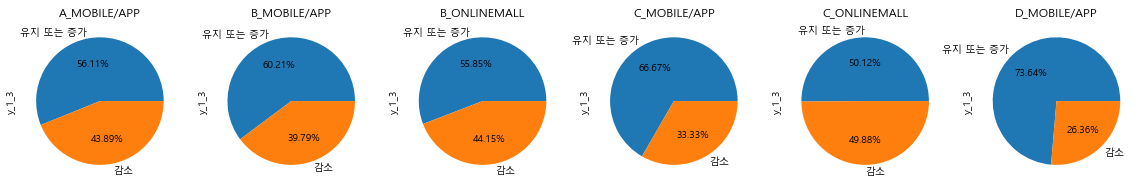

In [ ]:
# Ï†úÌú¥ÏÇ¨Î≥Ñ channel ÏÇ¨Ïö©Ïó¨Î∂Ä
fig, axes = plt.subplots(1,6,figsize=(20,5))

for n,col in enumerate(channel_count.columns[2:-7]):
    channel_user = channel_count[channel_count[col]>1]
    round(channel_user['y_1_3'].value_counts(1)*100,2).plot(kind='pie',
                                                            autopct='%.2f%%',
                                                            title=col,
                                                            labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                            ax=axes[n])

#### Í≥†Í∞ù ÌäπÏÑ±Î≥Ñ channel Ïù¥Ïö©Î•†

In [ ]:
# Ïó∞Î†πÎåÄ / channel(app/online)
for i in range(10, 61, 10):
    total = len(cust.query(f'Ïó∞Î†πÎåÄ=={i}'))
    both = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & Ïó∞Î†πÎåÄ=={i}'))
    app_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò==0 & Ïó∞Î†πÎåÄ=={i}'))
    online_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & Ïó∞Î†πÎåÄ=={i}'))
    
    print(f'========= {i}ÎåÄ ========')
    print(' - APP, ONLINE Î™®Îëê Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (both, both/total*100)) # Îëò Îã§ Ïù¥Ïö© 
    print(' - APPÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (app_only, app_only/total*100))
    print(' - ONLINEÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (online_only, online_only/total*100))

========= 10ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 0 Î™Ö (0.00%)
 - APPÎßå Ïù¥Ïö© : 1 Î™Ö (7.14%)
 - ONLINEÎßå Ïù¥Ïö© : 0 Î™Ö (0.00%)
========= 20ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 64 Î™Ö (7.21%)
 - APPÎßå Ïù¥Ïö© : 270 Î™Ö (30.41%)
 - ONLINEÎßå Ïù¥Ïö© : 11 Î™Ö (1.24%)
========= 30ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 568 Î™Ö (12.88%)
 - APPÎßå Ïù¥Ïö© : 1416 Î™Ö (32.11%)
 - ONLINEÎßå Ïù¥Ïö© : 84 Î™Ö (1.90%)
========= 40ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 558 Î™Ö (7.25%)
 - APPÎßå Ïù¥Ïö© : 1979 Î™Ö (25.70%)
 - ONLINEÎßå Ïù¥Ïö© : 227 Î™Ö (2.95%)
========= 50ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 206 Î™Ö (4.25%)
 - APPÎßå Ïù¥Ïö© : 1006 Î™Ö (20.78%)
 - ONLINEÎßå Ïù¥Ïö© : 113 Î™Ö (2.33%)
========= 60ÎåÄ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 23 Î™Ö (1.78%)
 - APPÎßå Ïù¥Ïö© : 154 Î™Ö (11.91%)
 - ONLINEÎßå Ïù¥Ïö© : 6 Î™Ö (0.46%)


In [ ]:
# ÏÑ±Î≥Ñ / channel(app/online)
for i in ['F','M']:
    total = len(cust.query(f'ÏÑ±Î≥Ñ=="{i}"'))
    both = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & ÏÑ±Î≥Ñ=="{i}"'))
    app_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò==0 & ÏÑ±Î≥Ñ=="{i}"'))
    online_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & ÏÑ±Î≥Ñ=="{i}"'))
    
    print(f'========= {i} ========')
    print(' - APP, ONLINE Î™®Îëê Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (both, both/total*100)) # Îëò Îã§ Ïù¥Ïö© 
    print(' - APPÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (app_only, app_only/total*100))
    print(' - ONLINEÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (online_only, online_only/total*100))

========= F ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 1223 Î™Ö (7.77%)
 - APPÎßå Ïù¥Ïö© : 4013 Î™Ö (25.51%)
 - ONLINEÎßå Ïù¥Ïö© : 381 Î™Ö (2.42%)
========= M ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 196 Î™Ö (5.74%)
 - APPÎßå Ïù¥Ïö© : 813 Î™Ö (23.82%)
 - ONLINEÎßå Ïù¥Ïö© : 60 Î™Ö (1.76%)


In [ ]:
# Í±∞Ï£ºÏßÄÏó≠ / channel(app/online)
for i in cust['Í±∞Ï£ºÏßÄÏó≠'].unique():
    total = len(cust.query(f'Í±∞Ï£ºÏßÄÏó≠=="{i}"'))
    both = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & Í±∞Ï£ºÏßÄÏó≠=="{i}"'))
    app_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò>0 & ONLINEÍµ¨Îß§ÌöüÏàò==0 & Í±∞Ï£ºÏßÄÏó≠=="{i}"'))
    online_only = len(channel_count.query(f'APPÎ°úÍ∑∏Ïù∏ÌöüÏàò==0 & ONLINEÍµ¨Îß§ÌöüÏàò>0 & Í±∞Ï£ºÏßÄÏó≠=="{i}"'))
    
    print(f'========= {i} ========')
    print(' - APP, ONLINE Î™®Îëê Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (both, both/total*100)) # Îëò Îã§ Ïù¥Ïö© 
    print(' - APPÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (app_only, app_only/total*100))
    print(' - ONLINEÎßå Ïù¥Ïö© : %d Î™Ö (%.2f%%)' % (online_only, online_only/total*100))

========= ÏÑúÏö∏Ïãú ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 421 Î™Ö (7.31%)
 - APPÎßå Ïù¥Ïö© : 1257 Î™Ö (21.83%)
 - ONLINEÎßå Ïù¥Ïö© : 96 Î™Ö (1.67%)
========= Í≤ΩÍ∏∞ÎèÑ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 421 Î™Ö (7.11%)
 - APPÎßå Ïù¥Ïö© : 1622 Î™Ö (27.38%)
 - ONLINEÎßå Ïù¥Ïö© : 148 Î™Ö (2.50%)
========= Í∞ïÏõêÎèÑ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 6 Î™Ö (3.39%)
 - APPÎßå Ïù¥Ïö© : 52 Î™Ö (29.38%)
 - ONLINEÎßå Ïù¥Ïö© : 6 Î™Ö (3.39%)
========= Ïù∏Ï≤úÍ¥ëÏó≠Ïãú ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 138 Î™Ö (12.99%)
 - APPÎßå Ïù¥Ïö© : 298 Î™Ö (28.06%)
 - ONLINEÎßå Ïù¥Ïö© : 26 Î™Ö (2.45%)
========= Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 142 Î™Ö (7.47%)
 - APPÎßå Ïù¥Ïö© : 499 Î™Ö (26.26%)
 - ONLINEÎßå Ïù¥Ïö© : 31 Î™Ö (1.63%)
========= ÎØ∏Í∏∞Ïû¨ ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 6 Î™Ö (3.68%)
 - APPÎßå Ïù¥Ïö© : 36 Î™Ö (22.09%)
 - ONLINEÎßå Ïù¥Ïö© : 6 Î™Ö (3.68%)
========= Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú ========
 - APP, ONLINE Î™®Îëê Ïù¥Ïö© : 6 Î™Ö (2.79%)
 - APPÎßå Ïù¥Ïö© :

# COMPUSE

In [ ]:
compuse_count = pd.pivot_table(compuse,
                index='Í≥†Í∞ùÎ≤àÌò∏',
                columns='Í≤ΩÏüÅÏÇ¨',
                values='Ï†úÌú¥ÏÇ¨',
                aggfunc='count').fillna(0)

compuse_count['c_A'] = compuse_count['A01'] + compuse_count['A02']
compuse_count['c_B'] = compuse_count['B01'] + compuse_count['B02']
compuse_count['c_C'] = compuse_count['C01'] + compuse_count['C02'] + compuse_count['C03']
compuse_count['c_D'] = compuse_count['D01'] + compuse_count['D02']
compuse_count['c_total'] = compuse_count['c_A'] + compuse_count['c_B'] + compuse_count['c_C'] + compuse_count['c_D']

compuse_count = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(compuse_count).fillna(0)

In [ ]:
purprd_count = pd.pivot_table(purprd.drop_duplicates(subset='ÏòÅÏàòÏ¶ùÎ≤àÌò∏'),
                              index='Í≥†Í∞ùÎ≤àÌò∏',
                              columns='Ï†úÌú¥ÏÇ¨',
                              values='ÏòÅÏàòÏ¶ùÎ≤àÌò∏',
                              aggfunc='count').fillna(0)
purprd_count['total'] = purprd_count.sum(axis=1)

compuse_count = compuse_count.join(purprd_count)

for name in ['A','B','C','D','total']:
    compuse_count[f'c_{name}_rate'] = round(compuse_count[f'c_{name}']/(compuse_count[f'c_{name}']+compuse_count[f'{name}'])*100, 2)
    
compuse_count.fillna(200, inplace=True) # ÎãπÏÇ¨, Í≤ΩÏüÅÏÇ¨ Îëò Îã§ Ïù¥Ïö© ÏïàÌïú Í≤ΩÏö∞

In [ ]:
def rate_cat(rate): # ÏûÑÏùòÎ°ú ÎÇòÎàî(Í∏∞Ï§Ä Îã§Ïãú Ï†ïÌïòÍ∏∞üëª) 
    if rate == 0:
        return 0
    elif 0 < rate <= 20:
        return 1
    elif 20 < rate <= 40:
        return 2
    elif 40 < rate <= 60:
        return 3
    elif 60 < rate <= 80:
        return 4
    elif 80 < rate <= 100:
        return 5
    elif rate == 200:
        return 6
    
for name in ['A','B','C','D']:
    compuse_count[f'c_{name}Îì±Í∏â'] = compuse_count[f'c_{name}_rate'].apply(rate_cat)

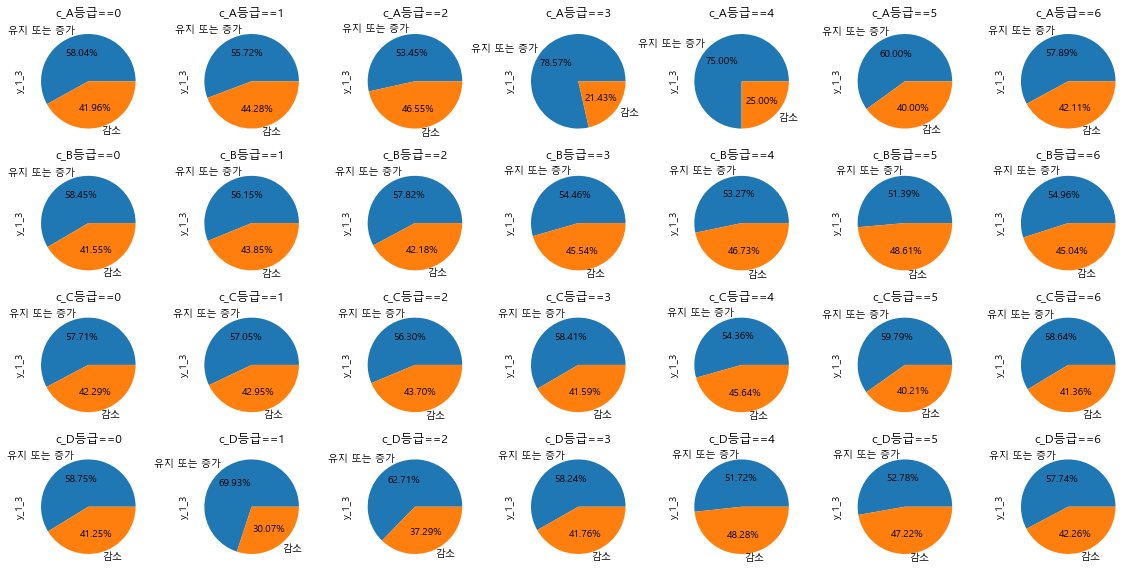

In [ ]:
fig, axes = plt.subplots(4, 7,figsize=(20,10))

for n,name in enumerate(['A','B','C','D']):
    for i in range(0, 7):
        compuse_count.query(f'c_{name}Îì±Í∏â=={i}')['y_1_3'].value_counts().plot(kind='pie',
                                                                   autopct='%.2f%%',
                                                                   labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                   title=f'c_{name}Îì±Í∏â=={i}',
                                                                   ax=axes[n,i])
        
# => B, D Í≤ΩÏüÅÏÇ¨Î•º Ïù¥Ïö©Ìïú Í≥†Í∞ùÏùò Í≤ΩÏö∞ Í≤ΩÏüÅÏÇ¨ Ïù¥Ïö©Î•† %Í∞Ä ÎÜíÏïÑÏßàÏàòÎ°ù Í∞êÏÜåÍ≥†Í∞ù Ï¶ùÍ∞ÄÌïú Í≤É Í∞ôÏùå

In [ ]:
compuse['Ïù¥Ïö©ÎÖÑÏõî'] = pd.to_datetime(compuse['Ïù¥Ïö©ÎÖÑÏõî'], format='%Y%m')
compuse['Ïõî'] = compuse['Ïù¥Ïö©ÎÖÑÏõî'].dt.month

compuse_month = pd.pivot_table(compuse,
              index='Í≥†Í∞ùÎ≤àÌò∏',
              columns='Ïõî',
              values='Ï†úÌú¥ÏÇ¨',
              aggfunc='count').fillna(0)

compuse_month['ÏÉÅÎ∞òÍ∏∞'] = compuse_month[list(range(1,7))].sum(axis=1)
compuse_month['ÌïòÎ∞òÍ∏∞'] = compuse_month[list(range(7,13))].sum(axis=1)

In [ ]:
def compare(ÏÉÅÎ∞òÍ∏∞, ÌïòÎ∞òÍ∏∞):
    if ÏÉÅÎ∞òÍ∏∞ < ÌïòÎ∞òÍ∏∞:
        return 'Ï¶ùÍ∞Ä'
    elif ÏÉÅÎ∞òÍ∏∞ == ÌïòÎ∞òÍ∏∞:
        return 'ÎèôÏùº'
    else:
        return 'Í∞êÏÜå'
    
compuse_month['Î≥ÄÎèô'] = compuse_month.apply(lambda x: compare(x['ÏÉÅÎ∞òÍ∏∞'], x['ÌïòÎ∞òÍ∏∞']), axis=1)

compuse_month = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(compuse_month)
compuse_month.fillna('ÎØ∏Ïù¥Ïö©', inplace=True)

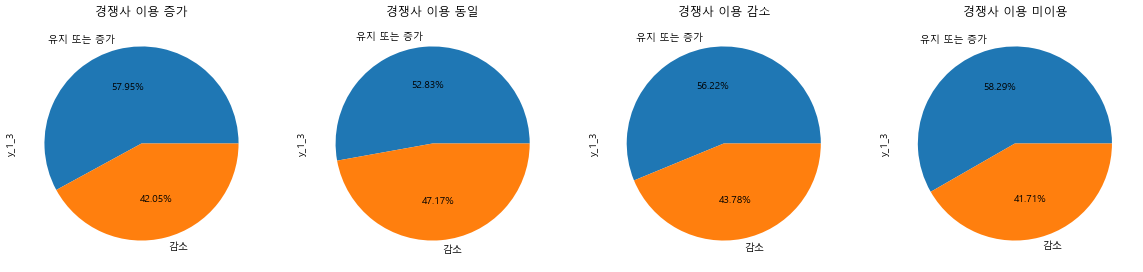

In [ ]:
# 2015ÎÖÑ ÏÉÅÎ∞òÍ∏∞/ÌïòÎ∞òÍ∏∞ Ïù¥Ïö©ÌöüÏàò Ï¶ùÍ∞Ä/ÎèôÏùº/Í∞êÏÜå/ÎØ∏Ïù¥Ïö©
fig, axes = plt.subplots(1, 4,figsize=(20,10))

for n,i in enumerate(['Ï¶ùÍ∞Ä','ÎèôÏùº','Í∞êÏÜå','ÎØ∏Ïù¥Ïö©']):
    compuse_month.query(f'Î≥ÄÎèô=="{i}"')['y_1_3'].value_counts().plot(kind='pie',
                                                                   autopct='%.2f%%',
                                                                   labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                                   title=f'Í≤ΩÏüÅÏÇ¨ Ïù¥Ïö© {i}',
                                                                   ax=axes[n])

# CUST

In [ ]:
cust_y = pd.merge(y, cust, on='Í≥†Í∞ùÎ≤àÌò∏')

In [ ]:
def get_pie(df, col):
    df1 = df.copy()
    num = len(df1[col].unique())
    fig, axes = plt.subplots(1, num,figsize=(20,10))
    
    if df1[[col]].dtypes[0] != 'object':
        df1[col] = df1[col].astype('str')
    
    col_li = sorted(list(df[col].unique()))
    for n,i in enumerate(col_li):
        df1.query(f'{col}=="{i}"')['y_1_3'].value_counts().plot(kind='pie',
                                                               autopct='%.2f%%',
                                                               labels=['Ïú†ÏßÄ ÎòêÎäî Ï¶ùÍ∞Ä','Í∞êÏÜå'],
                                                               title=f'{col}_{i}',
                                                               ax=axes[n])

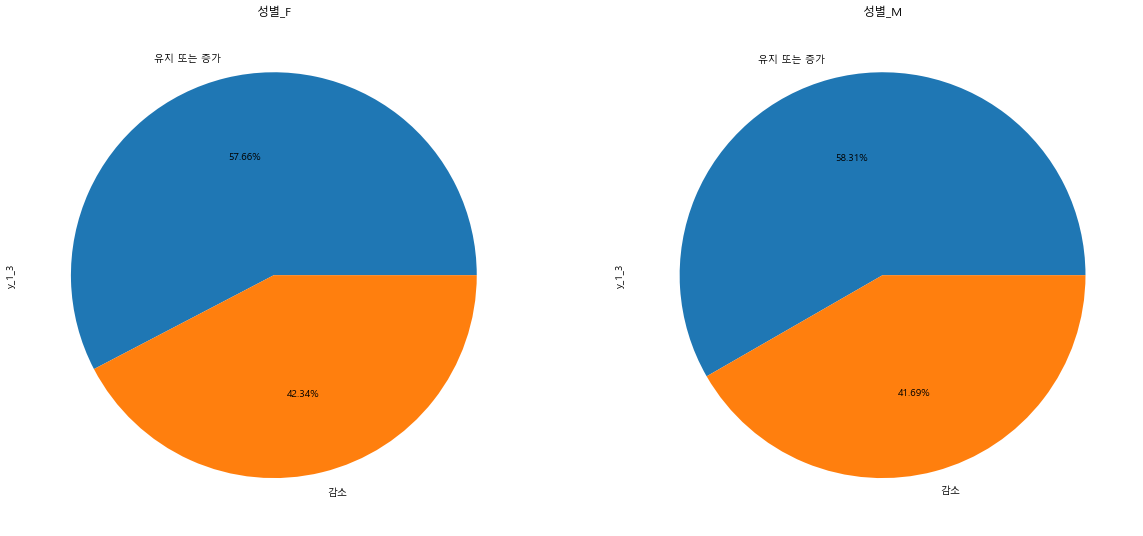

In [ ]:
get_pie(cust_y, 'ÏÑ±Î≥Ñ')

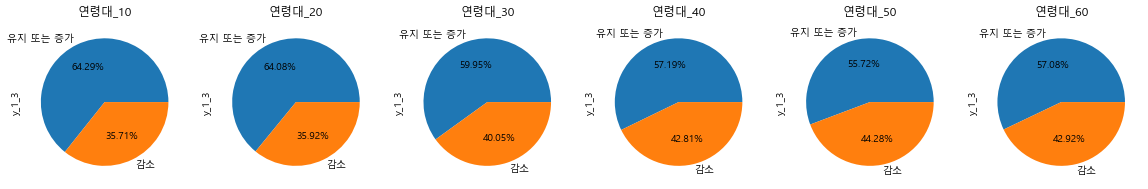

In [ ]:
get_pie(cust_y, 'Ïó∞Î†πÎåÄ')

# PRODCAT

In [ ]:
# ÏÉÅÌíàÎ∂ÑÎ•ò - ÎåÄÎ∂ÑÎ•ò, Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò Ï∂îÍ∞Ä(ÏàòÏûëÏóÖ)
cat_name = pd.read_excel('ÏÉÅÌíàÎ∂ÑÎ•ò.xlsx', index_col=0)[['ÏÜåÎ∂ÑÎ•òÏΩîÎìú','ÎåÄÎ∂ÑÎ•ò','Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò']]
prodcat = pd.merge(prodcat, cat_name, on=['ÏÜåÎ∂ÑÎ•òÏΩîÎìú'])

In [ ]:
purprd = pd.merge(purprd, prodcat[['ÏÜåÎ∂ÑÎ•òÏΩîÎìú','Ï§ëÎ∂ÑÎ•òÎ™Ö','ÏÜåÎ∂ÑÎ•òÎ™Ö','ÎåÄÎ∂ÑÎ•ò','Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò']])

# PURPRD_ÎπÑÏ§ë

In [ ]:
# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
purprd.drop(['ÎåÄÎ∂ÑÎ•òÏΩîÎìú','Ï§ëÎ∂ÑÎ•òÏΩîÎìú','ÏÜåÎ∂ÑÎ•òÏΩîÎìú'], axis=1, inplace=True)

#### Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò

In [ ]:
def to_rate(df, name):
    total = df.sum(axis=1)
    for col in df.columns:
        df[f'{col}_{name}_rate'] = round(df[col]/total*100, 2)
        df.drop(col, axis=1, inplace=True)
    return df

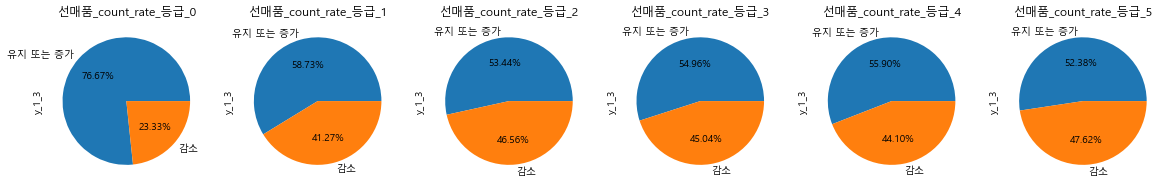

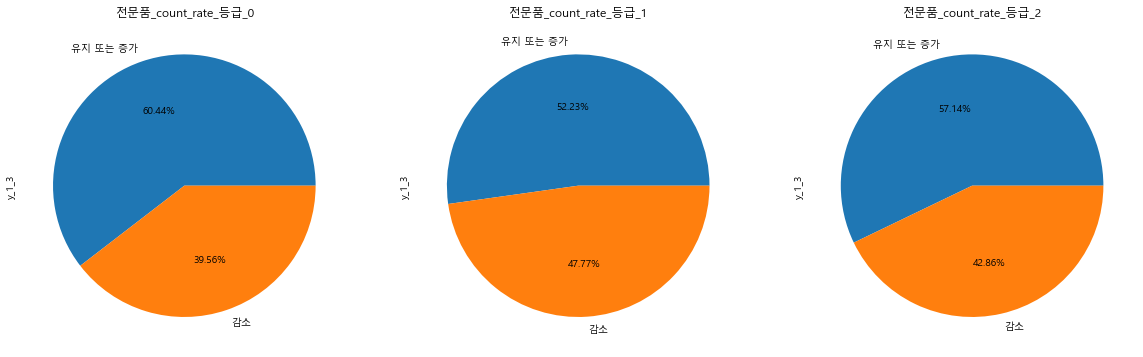

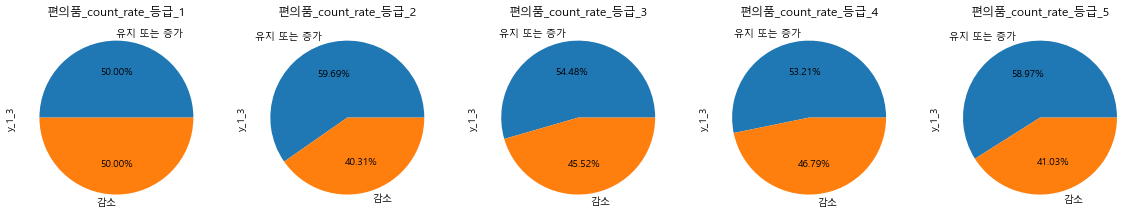

In [ ]:
# Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•òÎ≥Ñ Íµ¨Îß§ÌöüÏàòÏóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
purpose_cat_count = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='count').fillna(0)
to_rate(purpose_cat_count, 'count')
purpose_cat_count = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(purpose_cat_count)

for col in purpose_cat_count.columns[1:]:
    purpose_cat_count[f'{col}_Îì±Í∏â'] = purpose_cat_count[col].apply(rate_cat)
    
for col in purpose_cat_count.columns[4:]:
    get_pie(purpose_cat_count, col)

In [ ]:
# Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•òÎ≥Ñ Íµ¨Îß§Í∏àÏï°Ïóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
purpose_cat_sum = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='sum').fillna(0)
to_rate(purpose_cat_sum, 'sum')
purpose_cat_sum = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(purpose_cat_sum)

for col in purpose_cat_sum.columns[1:]:
    purpose_cat_sum[f'{col}_Îì±Í∏â'] = purpose_cat_sum[col].apply(rate_cat)

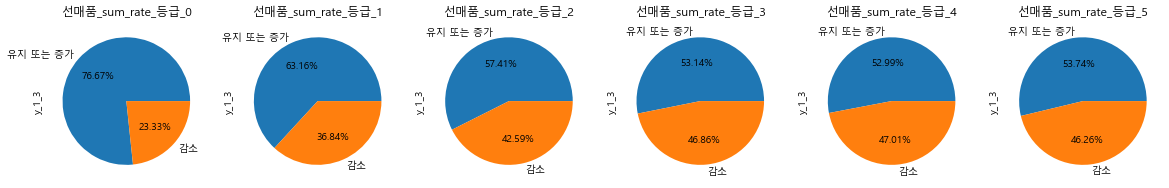

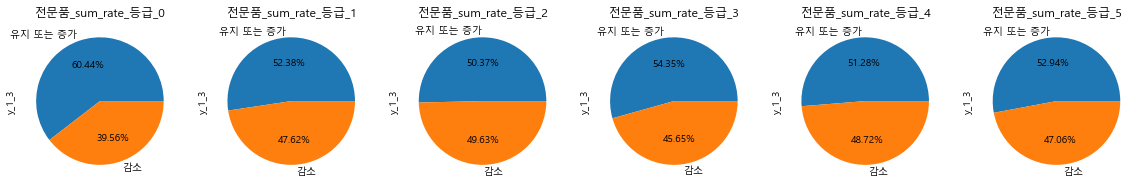

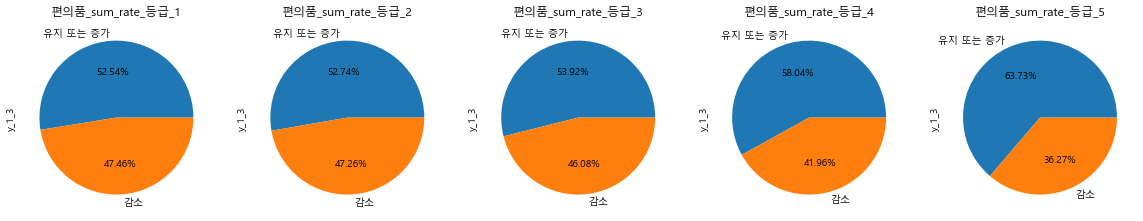

In [ ]:
for col in purpose_cat_sum.columns[4:]:
    get_pie(purpose_cat_sum, col)

#### ÎåÄÎ∂ÑÎ•ò

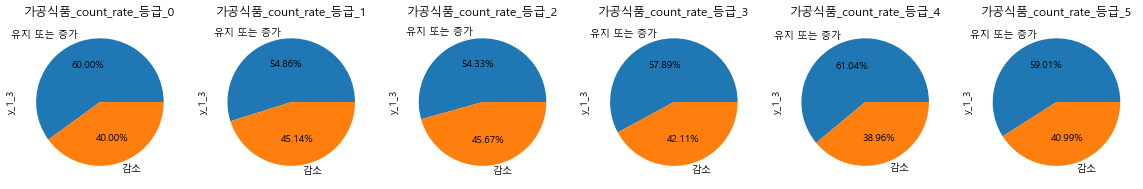

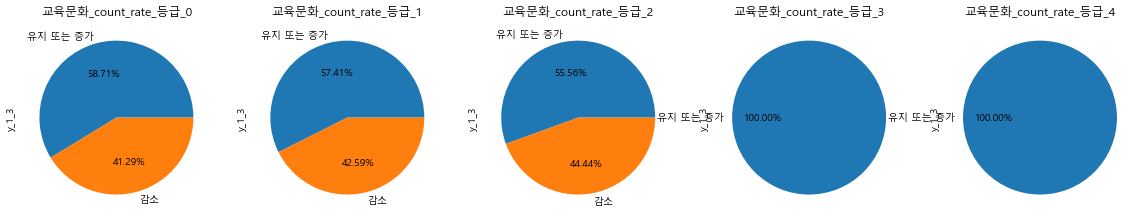

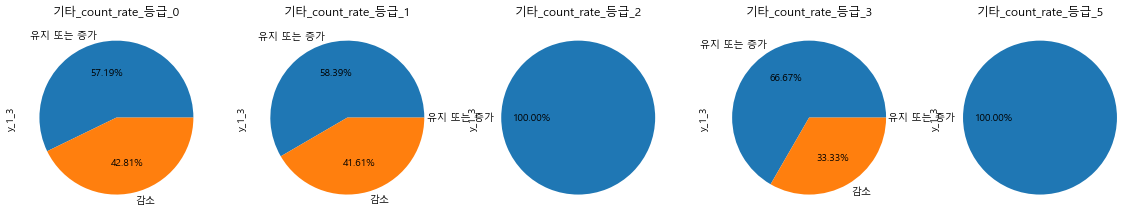

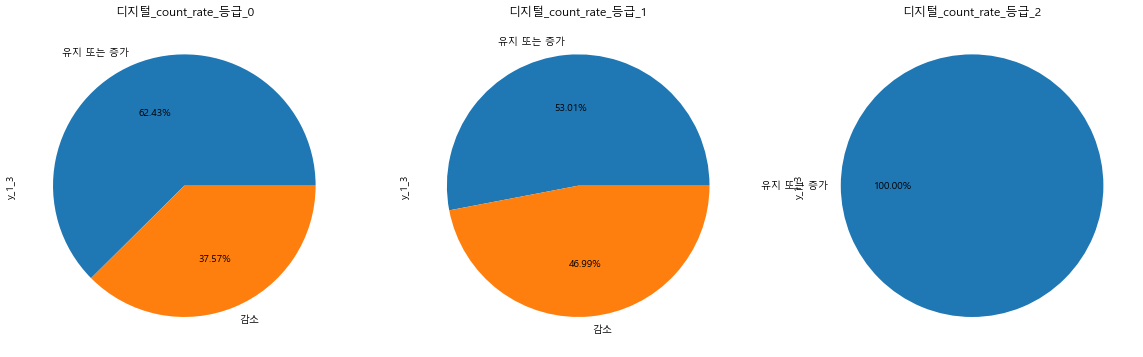

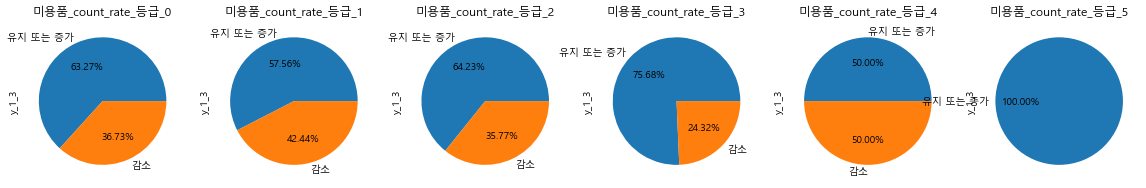

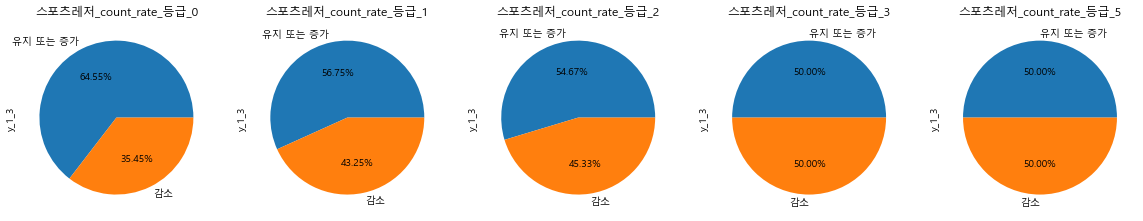

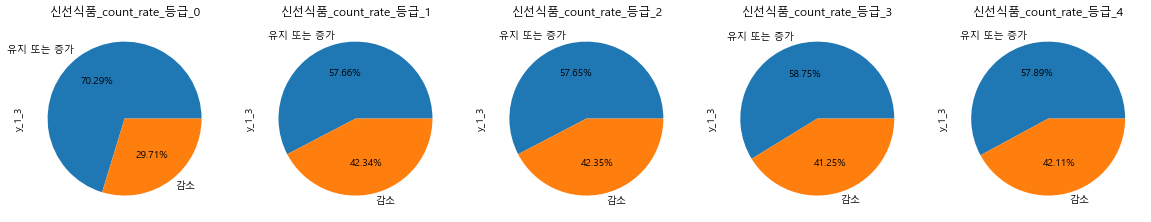

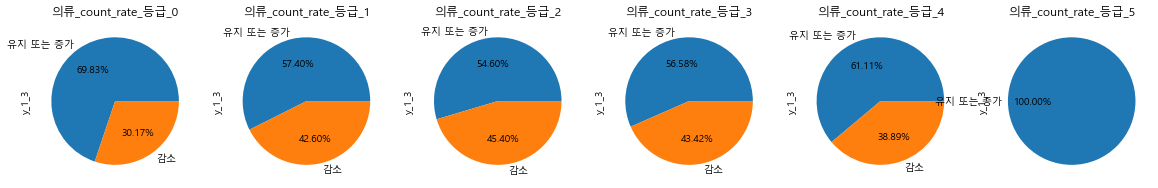

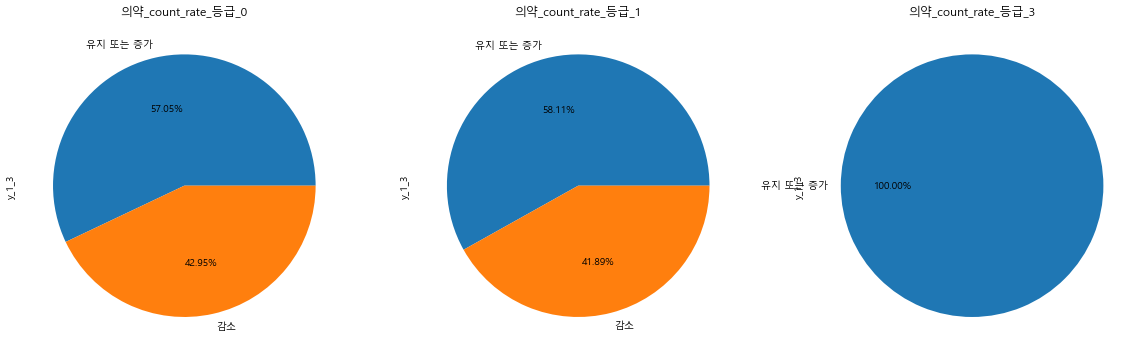

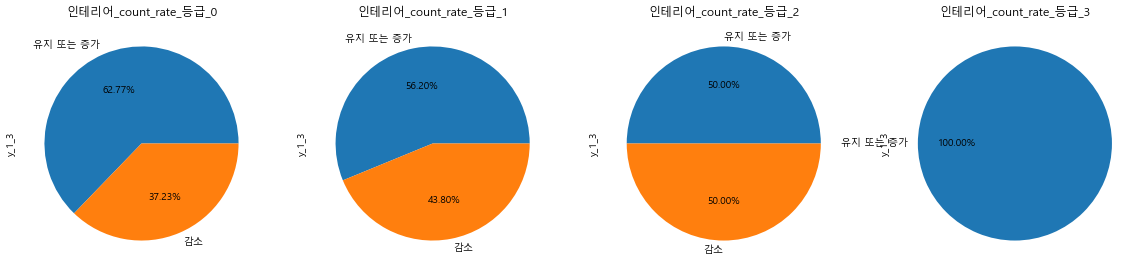

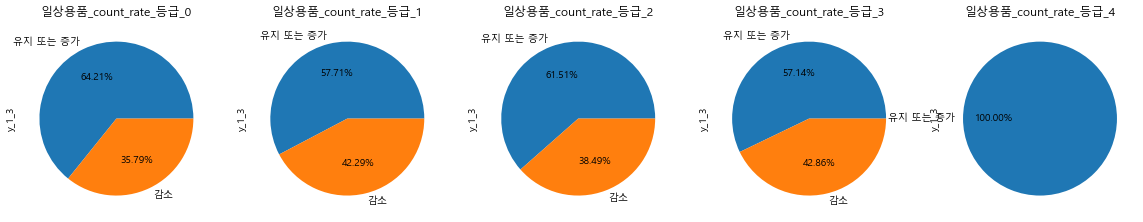

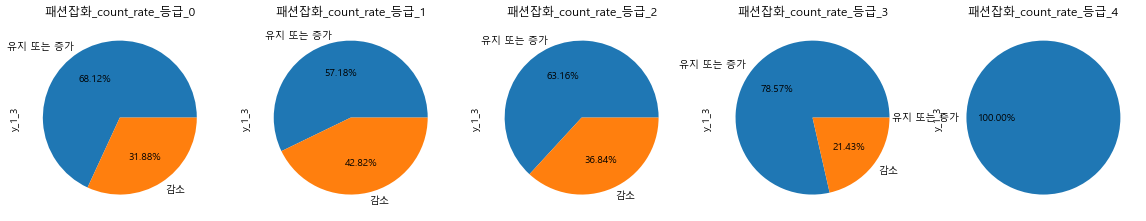

In [ ]:
# ÎåÄÎ∂ÑÎ•òÎ≥Ñ Íµ¨Îß§ÌöüÏàòÏóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
major_cat_count = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='ÎåÄÎ∂ÑÎ•ò',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='count').fillna(0)

to_rate(major_cat_count, 'count')
major_cat_count = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(major_cat_count)

for col in major_cat_count.columns[1:]:
    major_cat_count[f'{col}_Îì±Í∏â'] = major_cat_count[col].apply(rate_cat)
    
for col in major_cat_count.columns[-12:]:
    get_pie(major_cat_count, col)

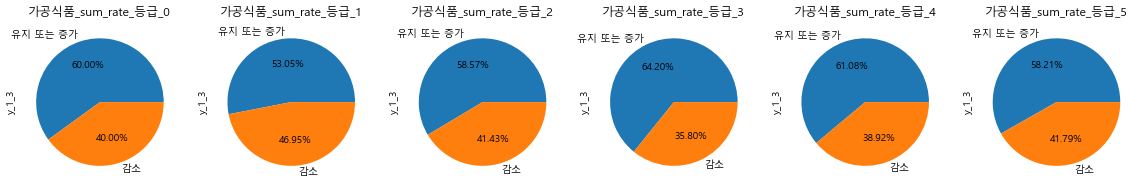

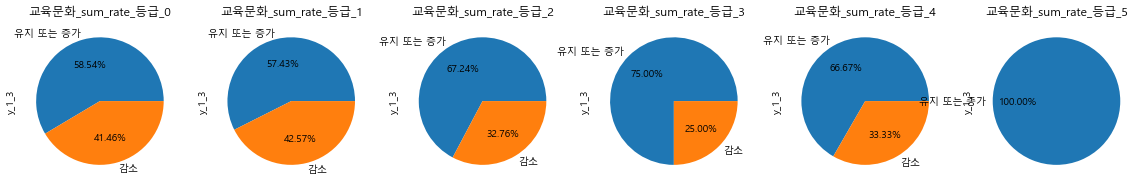

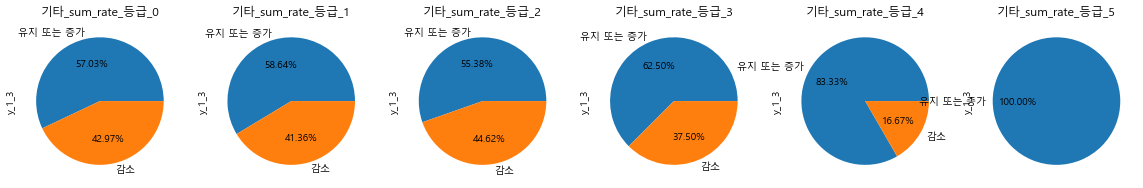

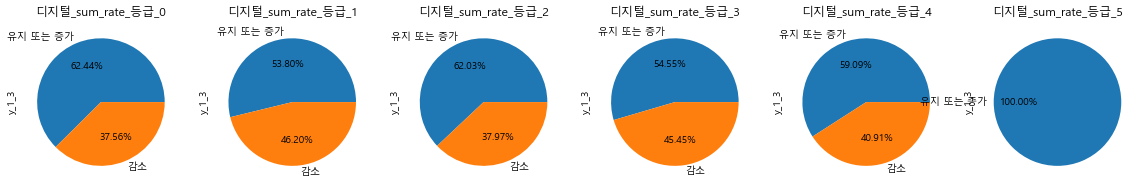

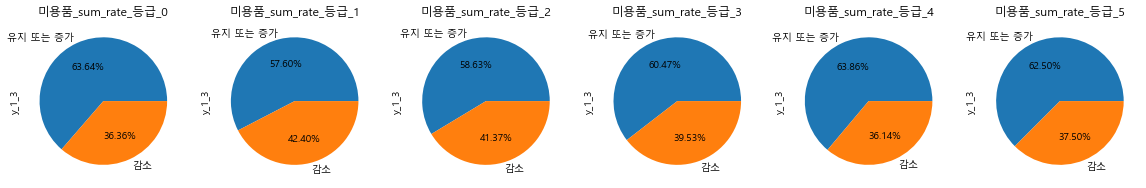

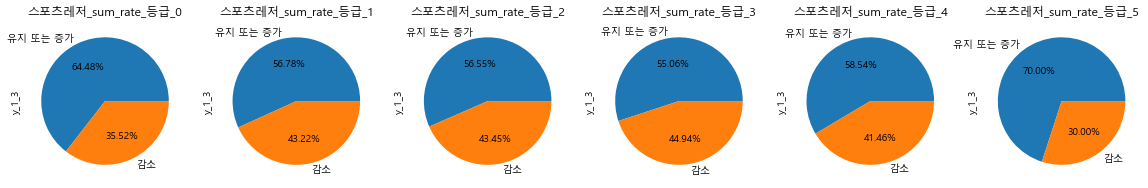

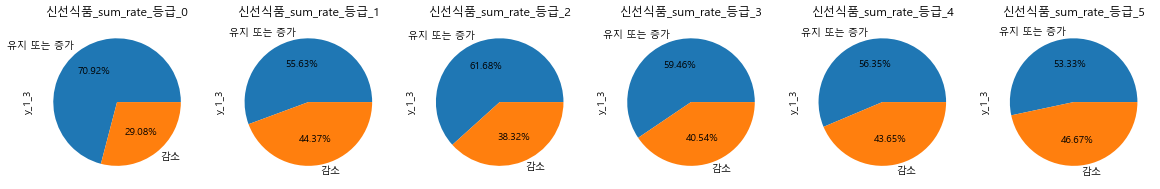

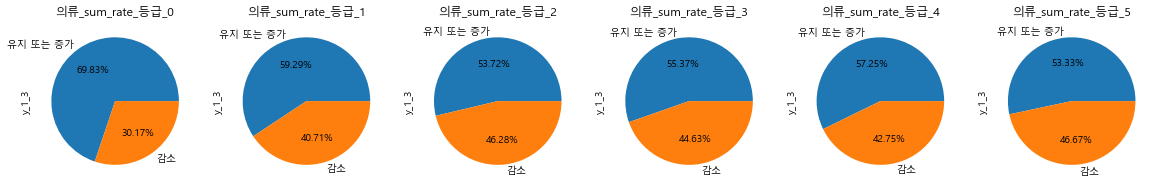

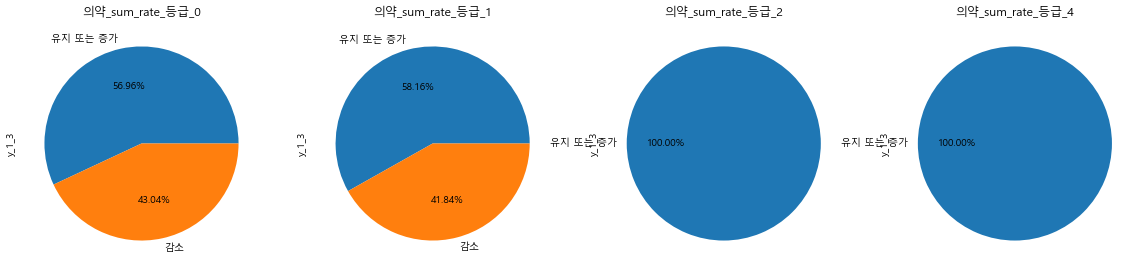

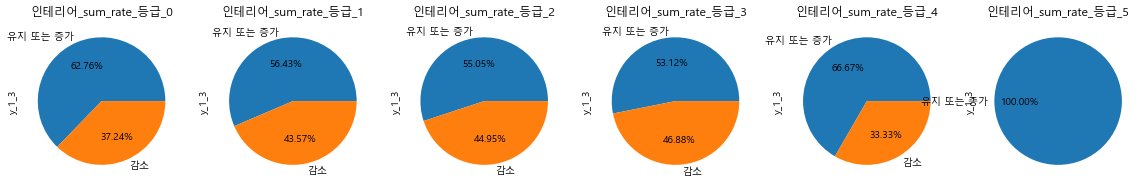

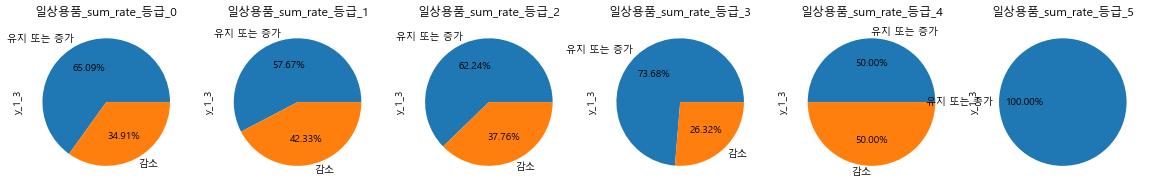

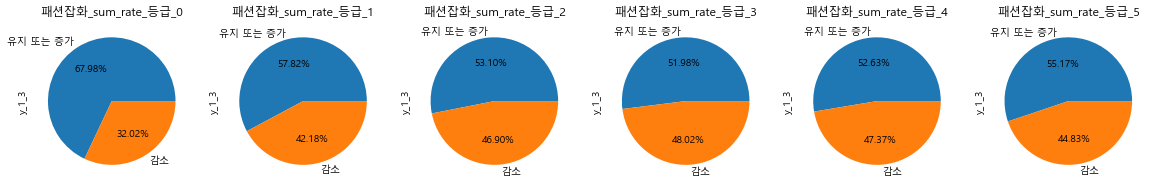

In [ ]:
# ÎåÄÎ∂ÑÎ•òÎ≥Ñ Íµ¨Îß§Í∏àÏï°Ïóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
major_cat_sum = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='ÎåÄÎ∂ÑÎ•ò',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='sum').fillna(0)
to_rate(major_cat_sum, 'sum')
major_cat_sum = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(major_cat_sum)

for col in major_cat_sum.columns[1:]:
    major_cat_sum[f'{col}_Îì±Í∏â'] = major_cat_sum[col].apply(rate_cat)
    
for col in major_cat_sum.columns[-12:]:
    get_pie(major_cat_sum, col)

#### Ï†úÌú¥ÏÇ¨

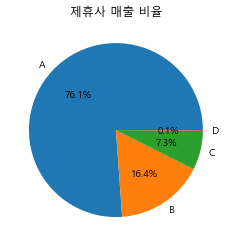

In [ ]:
# Ï†úÌú¥ÏÇ¨Î≥Ñ Îß§Ï∂ú ÎπÑÏú®
plt.pie(purprd.groupby('Ï†úÌú¥ÏÇ¨')['Íµ¨Îß§Í∏àÏï°'].sum(), labels=purprd.groupby('Ï†úÌú¥ÏÇ¨')['Íµ¨Îß§Í∏àÏï°'].sum().index, autopct='%.1f%%')
plt.title('Ï†úÌú¥ÏÇ¨ Îß§Ï∂ú ÎπÑÏú®')
plt.show()

In [ ]:
h_sales = pd.pivot_table(purprd,
                        index='Ï†úÌú¥ÏÇ¨',
                        columns='half',
                        values='Íµ¨Îß§Í∏àÏï°',
                        aggfunc='sum')

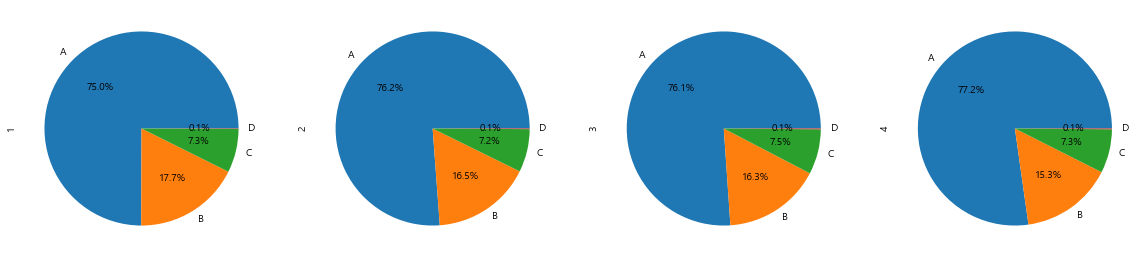

In [ ]:
# Î∞òÍ∏∞Î≥Ñ Ï†úÌú¥ÏÇ¨ Îß§Ï∂ú ÎπÑÏú®
fig, axes = plt.subplots(1,4,figsize=(20,5))

for n, col in enumerate(h_sales.columns):
    h_sales[col].plot(kind='pie', labels=h_sales.index, autopct='%.1f%%', ax=axes[n])

In [ ]:
round(h_sales/h_sales.sum()*100, 2)

half      1      2      3      4
Ï†úÌú¥ÏÇ¨                             
A     74.95  76.17  76.09  77.23
B     17.71  16.55  16.27  15.34
C      7.27   7.17   7.50   7.29
D      0.07   0.11   0.14   0.13

<BarContainer object of 4 artists>

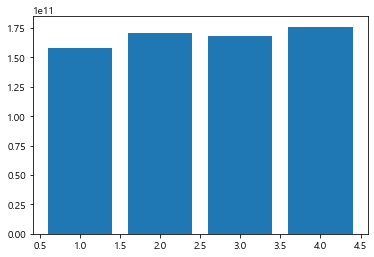

In [ ]:
# Î∞òÍ∏∞Î≥Ñ Ï†ÑÏ≤¥ Îß§Ï∂ú
plt.bar(h_sales.sum().index, h_sales.sum())

# ===> Ï†ÑÏ≤¥ Îß§Ï∂ú ÏÉÅÏäπÏÑ∏

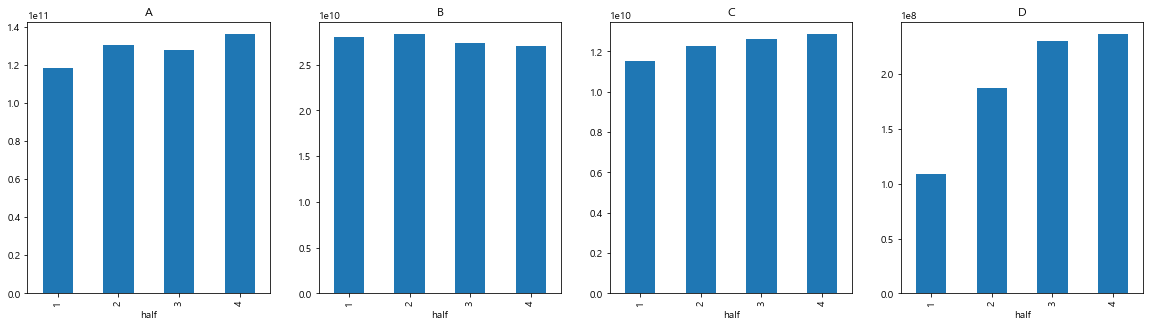

In [ ]:
# Î∞òÍ∏∞Î≥Ñ Ï†úÌú¥ÏÇ¨ Îß§Ï∂ú
fig, axes = plt.subplots(1,4,figsize=(20,5))

for n, idx in enumerate(h_sales.index):
    h_sales.T[idx].plot(kind='bar', ax=axes[n], title=idx)
    

# ===> B Ï†úÌú¥ÏÇ¨ Îß§Ï∂ú ÌïòÎùΩÏÑ∏
# ===> D Ï†úÌú¥ÏÇ¨(13ÎÖÑÎèÑ ÏãúÏûëÌïú Ïã†ÏÉù ÏÇ¨ÏóÖ)Îäî ÏÇ¨ÏóÖ ÌôïÏû•ÏúºÎ°ú Ïù∏Ìïú Îß§Ï∂ú ÏÉÅÏäπÏÑ∏Î°ú Ï∂îÏ∏°Îê®

<BarContainer object of 4 artists>

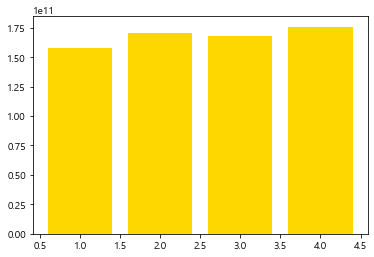

In [ ]:
# D Ï†úÌú¥ÏÇ¨Î•º Ï†úÏô∏Ìïú Ï†ÑÏ≤¥ Îß§Ï∂ú
plt.bar(h_sales.drop('D').sum().index, h_sales.drop('D').sum(), color='gold')

In [ ]:
# Ï¶ùÍ∞êÏú® Í≥ÑÏÇ∞(Í∏∞Í∞Ñ ÏûÖÎ†•)
def variation(df, period_1, period_2):
    variation = round((df[period_2]-df[period_1])/df[period_1]*100,2)
    return pd.DataFrame(variation)

In [ ]:
# Ï¶ùÍ∞êÏú® Í≥ÑÏÇ∞
def variation_df(df):
    for n, col in enumerate(df.columns[:-1]):
        variation = pd.Series((df[col+1]-df[col])/df[col]*100, name=col+1).round(2)
        if n==0:
            variation_df = variation
        else:
            variation_df = pd.concat([variation_df, variation], axis=1)
    variation_df
    return variation_df

variation_df(h_sales)

2      3     4
Ï†úÌú¥ÏÇ¨                    
A     9.86  -1.65  6.20
B     1.03  -3.18 -1.35
C     6.50   3.00  1.71
D    71.81  22.88  2.68

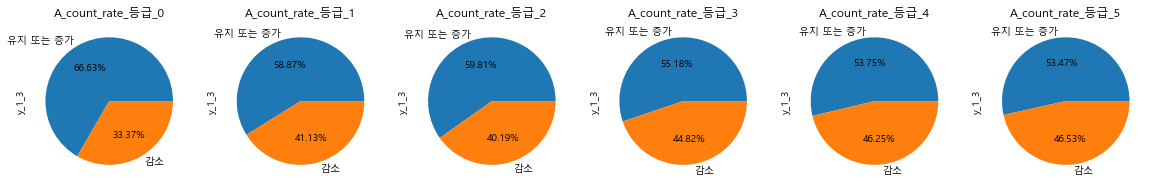

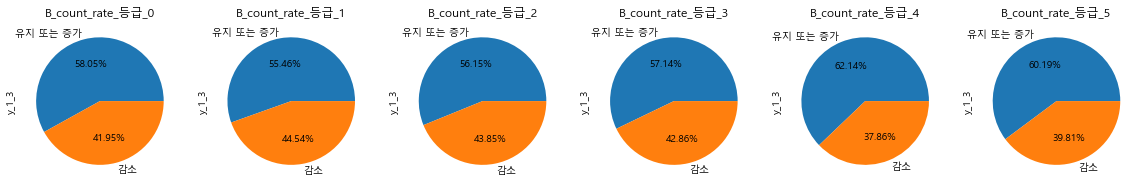

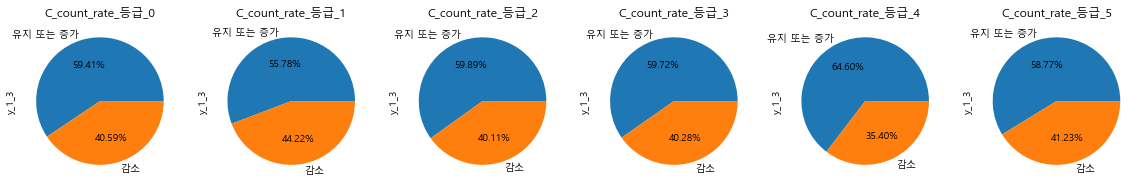

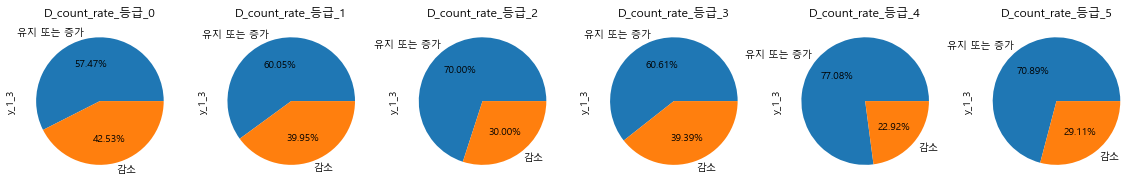

In [ ]:
# Ï†úÌú¥ÏÇ¨Î≥Ñ Íµ¨Îß§ÌöüÏàòÏóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
affiliate_count = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='Ï†úÌú¥ÏÇ¨',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='count').fillna(0)

to_rate(affiliate_count, 'count')
affiliate_count = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(affiliate_count)

for col in affiliate_count.columns[1:]:
    affiliate_count[f'{col}_Îì±Í∏â'] = affiliate_count[col].apply(rate_cat)
    
for col in affiliate_count.columns[5:]:
    get_pie(affiliate_count, col)

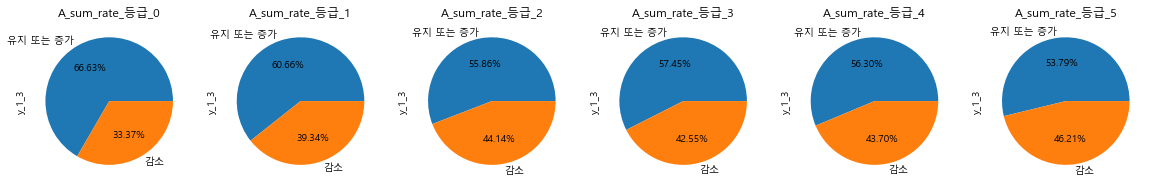

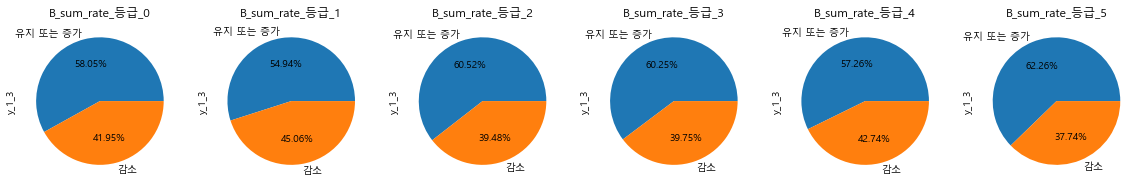

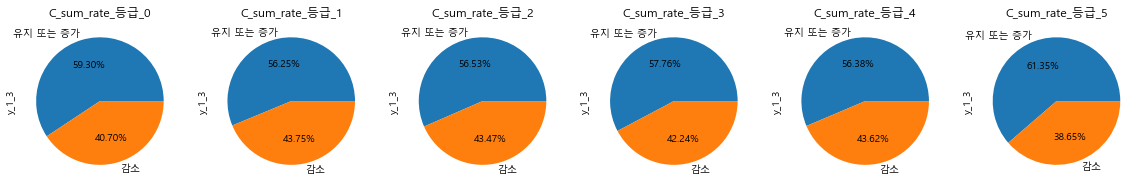

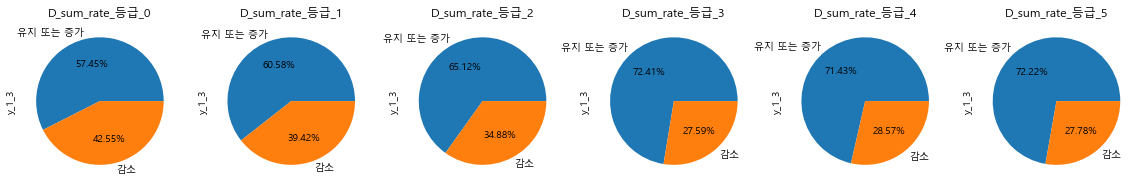

In [ ]:
# # Ï†úÌú¥ÏÇ¨Î≥Ñ Íµ¨Îß§Í∏àÏï°Ïóê Îî∞Î•∏ Íµ¨Îß§Ï¶ùÍ∞Ä/Í∞êÏÜåÍ≥†Í∞ù ÎπÑÏú®
affiliate_sum = pd.pivot_table(purprd.query('half==[1,2]'),
                                  index='Í≥†Í∞ùÎ≤àÌò∏',
                                  columns='Ï†úÌú¥ÏÇ¨',
                                  values='Íµ¨Îß§Í∏àÏï°',
                                  aggfunc='sum').fillna(0)
to_rate(affiliate_sum, 'sum')
affiliate_sum = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(affiliate_sum)

for col in affiliate_sum.columns[1:]:
    affiliate_sum[f'{col}_Îì±Í∏â'] = affiliate_sum[col].apply(rate_cat)
    
for col in affiliate_sum.columns[5:]:
    get_pie(affiliate_sum, col)

#### Íµ¨Îß§ÏùºÏûê(ÏöîÏùº)

In [ ]:
def weekday(day):
    if day in [0,1,2,3,4]:
        return 'ÌèâÏùº'
    elif day in [5,6]:
        return 'Ï£ºÎßê'
    
purprd['ÏöîÏùº'] = purprd['weekday'].apply(weekday)

In [ ]:
weekdays = pd.pivot_table(purprd.drop_duplicates(subset='ÏòÅÏàòÏ¶ùÎ≤àÌò∏'),
              index='Í≥†Í∞ùÎ≤àÌò∏',
              columns='ÏöîÏùº',
              values='ÏòÅÏàòÏ¶ùÎ≤àÌò∏',
              aggfunc='count')

to_rate(weekdays, '')
weekdays = y.set_index('Í≥†Í∞ùÎ≤àÌò∏').join(weekdays)

for col in weekdays.columns[1:]:
    weekdays[f'{col}_Îì±Í∏â'] = weekdays[col].apply(rate_cat)

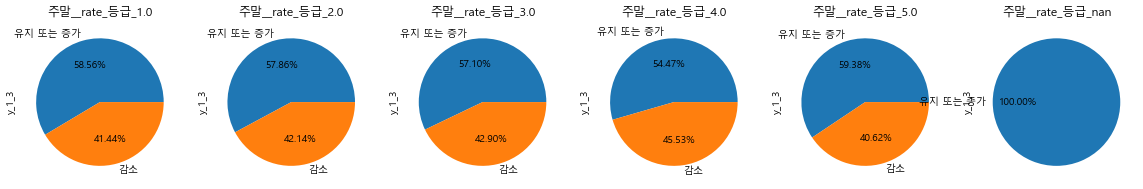

In [ ]:
get_pie(weekdays, 'Ï£ºÎßê__rate_Îì±Í∏â')

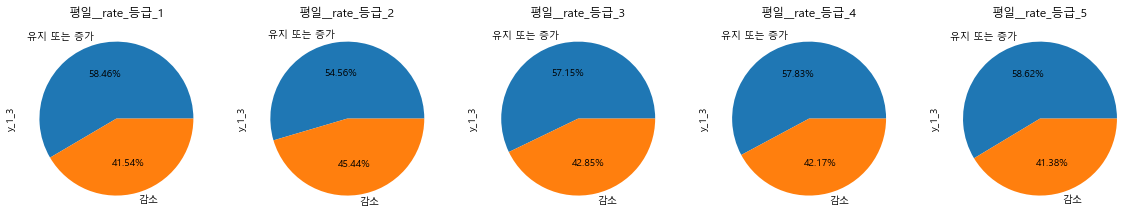

In [ ]:
get_pie(weekdays, 'ÌèâÏùº__rate_Îì±Í∏â')

# PURPRD_Ï¶ùÍ∞êÏú®

In [ ]:
purprd.head(1)

Ï†úÌú¥ÏÇ¨    ÏòÅÏàòÏ¶ùÎ≤àÌò∏   Í≥†Í∞ùÎ≤àÌò∏  Ï†êÌè¨ÏΩîÎìú       Íµ¨Îß§ÏùºÏûê  Íµ¨Îß§ÏãúÍ∞Ñ  Íµ¨Îß§Í∏àÏï°  year  quarter  weekday  \
0   B  8664000  17218    44 2014-02-22    20  2420  2014        1        5   

   half  Ï§ëÎ∂ÑÎ•òÎ™Ö ÏÜåÎ∂ÑÎ•òÎ™Ö   ÎåÄÎ∂ÑÎ•ò Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò  ÏöîÏùº  
0     1  ÌÉÑÏÇ∞ÏùåÎ£å  ÏÇ¨Ïù¥Îã§  Í∞ÄÍ≥µÏãùÌíà    Ìé∏ÏùòÌíà  Ï£ºÎßê

In [ ]:
# Ï¶ùÍ∞êÏú® Í≥ÑÏÇ∞(purprd, Íµ¨Îß§Í∏àÏï° Í∏∞Ï§Ä)
def purprd_amount_pv(df, col, period1, period2):
    for i in [period1, period2]:
        globals()[f'p{i}'] = pd.pivot_table(purprd.query(f'half=={i}'),
                                           index='Í≥†Í∞ùÎ≤àÌò∏',
                                           columns=col,
                                           values='Íµ¨Îß§Í∏àÏï°',
                                           aggfunc='sum').fillna(0)
        
    variation = (globals()[f'p{period2}'] - globals()[f'p{period1}'])/globals()[f'p{period1}']
    return variation.replace({np.inf:1, np.nan:0})

In [ ]:
# Ï¢ÖÏÜçÎ≥ÄÏàò ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ 0,1 Î≥ÄÌôò Ï†Ñ Ï¶ùÍ∞êÏú®ÍπåÏßÄÎßå Í≥ÑÏÇ∞
def y_test(df,half1,half2):
    sales = pd.pivot_table(df,index='Í≥†Í∞ùÎ≤àÌò∏', # Í≥†Í∞ùÎ≥Ñ Î∞òÍ∏∞ Îß§Ï∂ú
                              columns = 'half',
                              values = 'Íµ¨Îß§Í∏àÏï°',
                              aggfunc= 'sum')
    rate_variation = (sum(sales[int(half2)])-sum(sales[int(half1)]))/sum(sales[int(half1)]) # Ï†ÑÏ≤¥ Îß§Ï∂ú Ï¶ùÍ∞êÏú®
    sales[f'y_{half1}_{half2}'] = (sales[int(half2)] - sales[int(half1)])/sales[int(half1)]/rate_variation # Í≥†Í∞ùÎ≥Ñ Îß§Ï∂ú Ï¶ùÍ∞êÏú®
    
    sales = sales[[f'y_{half1}_{half2}']]
    return sales.reset_index()

yy = y_test(purprd, 1, 3)

<AxesSubplot:>

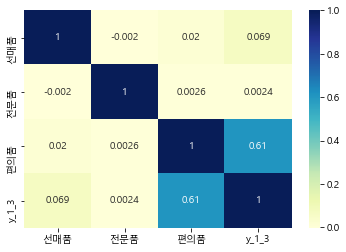

In [ ]:
sns.heatmap(purprd_amount_pv(purprd, 'Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò', 1, 2).join(yy.set_index('Í≥†Í∞ùÎ≤àÌò∏')).corr(),
           annot=True,cmap='YlGnBu')

# => Ìé∏ÏùòÌíà Î∞òÍ∏∞Î≥Ñ Íµ¨Îß§Í∏àÏï° Ï¶ùÍ∞êÏú®Í≥º Íµ¨Îß§Í∏àÏï° Ï¶ùÍ∞êÏú® ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùå

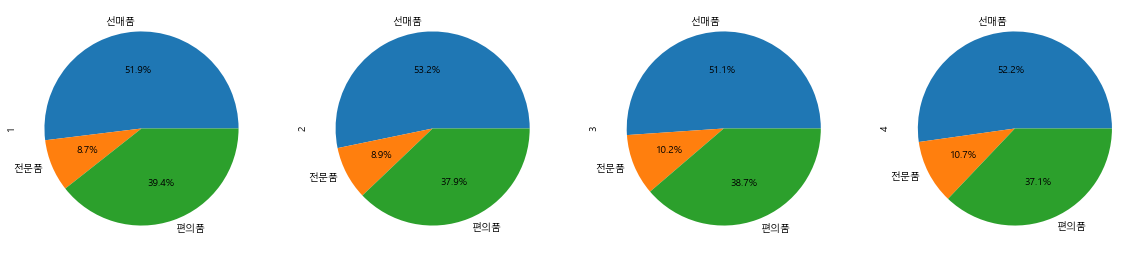

In [ ]:
# Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•òÎ≥Ñ Íµ¨Îß§Í∏àÏï° ÎπÑÏ§ë(Î∞òÍ∏∞Î≥Ñ)
pv_1 = pd.pivot_table(purprd,
              index='Íµ¨Îß§Î™©Ï†ÅÎ∂ÑÎ•ò',
              columns='half',
              values='Íµ¨Îß§Í∏àÏï°',
              aggfunc='sum')

fig, axes = plt.subplots(1,4,figsize=(20,5))

for n, col in enumerate(pv_1.columns):
    pv_1[col].plot(kind='pie', labels=pv_1.index, autopct='%.1f%%', ax=axes[n])

<AxesSubplot:>

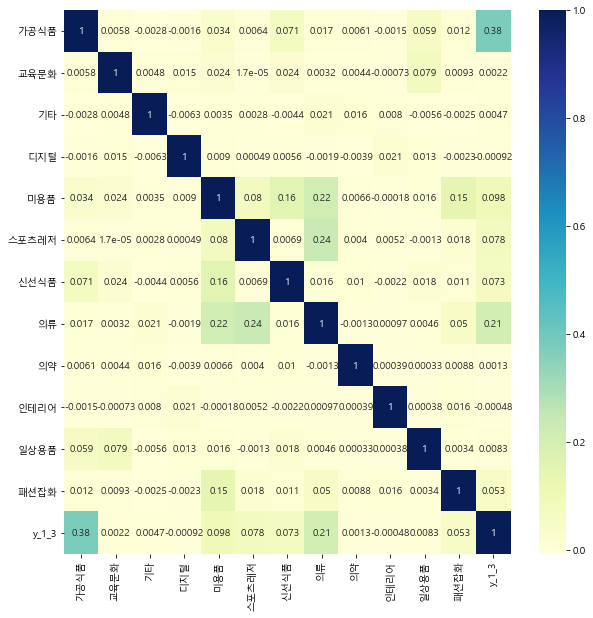

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(purprd_amount_pv(purprd, 'ÎåÄÎ∂ÑÎ•ò', 1, 2).join(yy.set_index('Í≥†Í∞ùÎ≤àÌò∏')).corr(),
           annot=True,cmap='YlGnBu')

<AxesSubplot:>

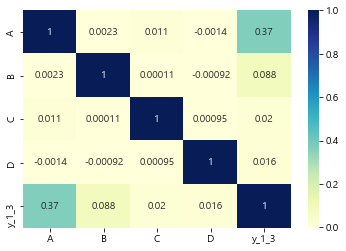

In [ ]:
sns.heatmap(purprd_amount_pv(purprd, 'Ï†úÌú¥ÏÇ¨', 1, 2).join(yy.set_index('Í≥†Í∞ùÎ≤àÌò∏')).corr(),
           annot=True,cmap='YlGnBu')

<AxesSubplot:>

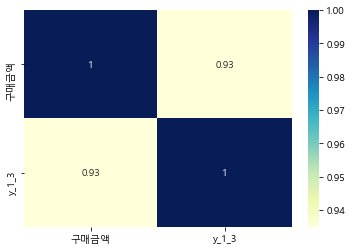

In [ ]:
sns.heatmap(purprd_amount_pv(purprd, None, 1, 2).join(yy.set_index('Í≥†Í∞ùÎ≤àÌò∏')).corr(),
           annot=True,cmap='YlGnBu') # 1, 2Î∞òÍ∏∞ Íµ¨Îß§Í∏àÏï° Ï¶ùÍ∞êÏú®